
# 1. Bazı önemli kütüphaneleri importla


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


# 2. Veriyi hazırla

In [2]:
df_review = pd.read_csv("movie.csv")
df_positive = df_review[df_review['label']==1][:5000]
df_negative = df_review[df_review['label']==0][:5000]

df_review = pd.concat([df_positive,df_negative])
df_review

,text,label
4,Im a die hard Dads Army fan and nothing will e...,1
6,Finally watched this shocking movie last night...,1
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1
10,I can't believe people are looking for a plot ...,1
...,...,...
9907,Whoever gave this movie rave reviews needs to ...,0
9908,OH MY God I am lost Now I know everything this...,0
9911,"A stupid movie, with a stupid plot. Feels like...",0
9913,Stone has tried another type of movie. Any Giv...,0


# NLTK ile tokenizasyon işlemini yap. Veriyi temizle

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Punctuation removal
    punctuation = set(string.punctuation)
    tokens = [token for token in tokens if token not in punctuation]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Other preprocessing steps (e.g., stemming, handling special characters, etc.) can be added here

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df_review["text"] = df_review["text"].apply(preprocess_text)
df_review

,text,label
4,im die hard dads army fan nothing ever change ...,1
6,finally watched shocking movie last night dist...,1
8,may remake 1987 autumn 's tale eleven years di...,1
9,super ex girlfriend turned pleasant surprise r...,1
10,ca n't believe people looking plot film laural...,1
...,...,...
9907,whoever gave movie rave reviews needs see movi...,0
9908,oh god lost know everything guy pointless r j ...,0
9911,stupid movie stupid plot feels like threw ever...,0
9913,stone tried another type movie given sunday fa...,0


#### Verisetinden alınan kesitteki sınıflar

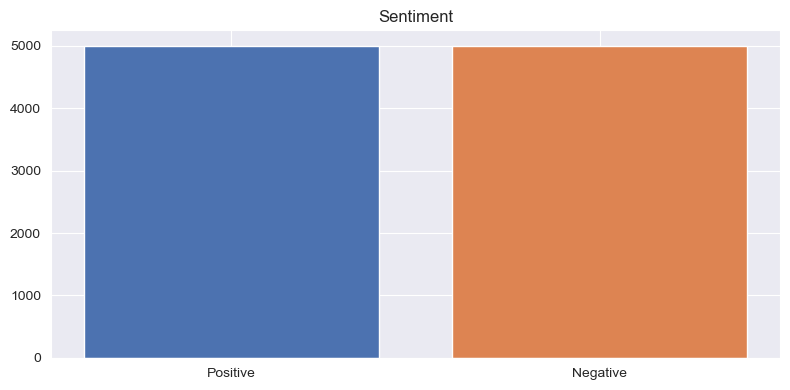

In [6]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review.value_counts(['label']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()


## Splitting data into train and test set


In [7]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review,test_size =0.33,random_state=42)

In [8]:
train_x, train_y = train['text'], train['label']
test_x, test_y = test['text'], test['label']

In [9]:
train_y.value_counts()

0    3378
1    3322
Name: label, dtype: int64


# 3.Text Representation (Bag of words)


Classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. This is why we need to turn our movie review text into numerical vectors.

we’ll use bag of words (BOW) since we care about the frequency of the words in text reviews; however, the order of words is irrelevant. Two common ways to represent bag of words are CountVectorizer and Term Frequency, Inverse Document Frequency (TF-IDF)

verisetindeki kelimeler vektörlere dönüştürüldü

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)


# 4.Model Selection

Supervised öğrenmenin gerçekleştirileceği ve tanımlanmış yazıların kullanılabileceği yöntemler denendi.

Sentiment analizinde şık karşılaşılan 4 model seçildi.



##  Support Vector Machine(SVM)


In [12]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')


## Decision Tree


In [14]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()


## Naive Bayes


In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()


## Logistic Regression


In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

LogisticRegression()


# 5. Model Evaluation


## Mean Accuracy

In [17]:
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

0.8690909090909091
0.6948484848484848
0.6412121212121212
0.8678787878787879


Yukarıdaki skorlara bakılırsa en iyi sonuç veren modeller SVM ve Logistic Regression oluyor.

## F1 Score

SVM modelin F1 skoru

In [18]:
from sklearn.metrics import f1_score

f1_score(test_y,svc.predict(test_x_vector),
          labels = [1,0],average=None)

array([0.87301587, 0.86491557])

## Classification report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = [1,0]))

              precision    recall  f1-score   support

           1       0.86      0.88      0.87      1678
           0       0.88      0.85      0.86      1622

    accuracy                           0.87      3300
   macro avg       0.87      0.87      0.87      3300
weighted avg       0.87      0.87      0.87      3300



## Confusion Matrix

Matrix oluşturularak doğru ve yanlış tahminlerin dağılımı incelenebilir

In [20]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = [1, 0])
conf_mat

array([[1485,  193],
       [ 239, 1383]], dtype=int64)


# 6. Try A Different Approach


## GridSearchCV

Farklı parametrelerin çalıştırılmasıyla en iyi olan parametreyi bulmaya çalışıyor. Diğer yöntemlerden daha uzun sürüyor.

In [21]:
from sklearn.model_selection import GridSearchCV
#set the parameters
params = {'C': [1,4,8,16], 'kernel' : ['linear','rbf']}
svc_in_gridCV = SVC()
svc_grid = GridSearchCV(svc_in_gridCV,params, cv = 5, n_jobs=-1)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 4, 8, 16], 'kernel': ['linear', 'rbf']})

In [22]:
print(svc_grid.best_params_)
print(svc_grid.best_estimator_)

{'C': 4, 'kernel': 'rbf'}
SVC(C=4)


En iyi yöntem olarak C: 4, kernel: rbf bulundu. Daha yüksek skoru bu parametrelerle elde edebiliriz

In [23]:
svc_grid.score(test_x_vector, test_y)

0.8703030303030304

In [24]:
import webScraper

## How I Met Your Mother dizisi için sentiment analizi yapılacak

In [25]:
imdb_url = "https://www.imdb.com/title/tt0460649/reviews"

comments = webScraper.scrape_for_comments(imdb_url)


Loading comments: 995/995 [==================================================]
All comments 995

find specific 0.00764159995742375
, find all next 0.14046280000184197
, extract text 0.10372949993325165
, find review count 0.04324289999931352
, init soups 1.4155541000218363
, load page source 31.175738400008413
Total time: 33.092256799995084


In [26]:
np_array = pd.Series(list(comments))
np_review_preprocessed = np_array[:].apply(preprocess_text)
np_review_preprocessed

0      one people happy ending give bad rating one si...
1      met mother go one better comedies all-time rig...
2      one original funny sitcoms 've watching bad wo...
3      note n't start watching show till past fall 20...
4      great show binge watch mainly flash backs n't ...
                             ...                        
990    watch every show least twice three four times ...
991    review contains spoilers met mother hands grea...
992    ok officially seen everythingand 'm sad mean n...
993    's pretty great show little bit right conversa...
994    first started watching show would see pop netf...
Length: 995, dtype: object

In [27]:

comment_vector = tfidf.transform(np_review_preprocessed)

In [28]:

comments_pred = svc_grid.predict(comment_vector)

In [29]:
len(comments_pred[comments_pred == 0]), len(comments_pred[comments_pred == 1])

(215, 780)

In [30]:
svc_comments_pred = svc.predict(comment_vector)

In [31]:
coefficients = svc.coef_


In [32]:

feature_names = tfidf.get_feature_names_out()

# Assuming you have coefficients from a logistic regression model
feature_coefficients = dict(zip(feature_names, coefficients[0]))

In [33]:
print(feature_coefficients.values())

dict_values([<1x43929 sparse matrix of type '<class 'numpy.float64'>'
	with 37785 stored elements in Compressed Sparse Row format>])


### NOT:: Bu method kelimelerin önemlerini hesaplıyor ve çıktı olarak üretiyor. AMA çalışması 1-2 dk sürüyor ve yaklaşık 40 GB RAM tüketiyor. 

In [34]:
def get_top_important_words(vectorizer, vector):
    # Get the feature names
    feature_names = vectorizer.get_feature_names_out()

    # Get the IDF scores
    idf_scores = vectorizer.idf_
    
    # Calculate word importance
    word_importance = idf_scores.reshape(-1, 1) * vector.mean(axis=0)

    # Sort words based on importance score
    sorted_indices = word_importance.argsort()[0, ::-1]
    sorted_words = [feature_names[idx] for idx in sorted_indices]

    # Select top N words
    top_n = 50
    top_words = sorted_words[:top_n]

    return top_words

In [35]:
sorted_words = get_top_important_words(tfidf, comment_vector)
reason = ""
for word in range(50):
    reason += sorted_words[0][0][word] + ", "

print(reason)

ted, barney, season, robin, friends, mother, met, series, episode, seasons, love, sitcom, ending, episodes, lily, watch, funny, characters, really, watching, great, like, marshall, best, watched, character, good, time, life, harris, comedy, neil, story, end, amazing, tv, shows, patrick, jokes, perfect, 10, think, sitcoms, people, know, makes, times, dary, ve, wait, 


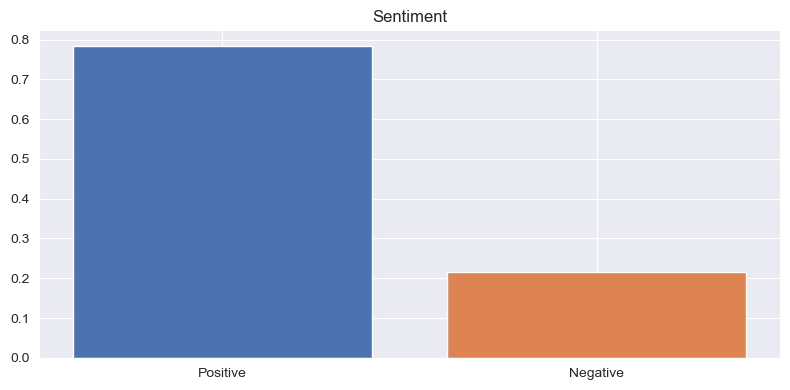

In [36]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=pd.Series(comments_pred).value_counts(['label']),
        color=colors[:2])
plt.title('Sentiment')
plt.show()


### Daha kısa sürecek ve daha az bellek kullanacak method geliştirildi ancak method çıktıları alakasız ve çoğu zaman istenmeyen sonuçlar gösteriyor

In [37]:
def get_top_important_words_optimized(vectorizer, vector):
    # Get the feature names
    feature_names = vectorizer.get_feature_names_out()

    print(vectorizer.idf_.shape, vector.shape)
    # Calculate word importance
    word_importance = vectorizer.idf_.reshape(-1, 1).T * vector.T

    # Convert the 2-dimensional array to 1-dimensional
    word_importance = np.asarray(word_importance).ravel()

    # Sort words based on importance score
    sorted_indices = word_importance.argsort()[::-1]
    sorted_words = [feature_names[idx] for idx in sorted_indices]

    # Select top N words
    top_n = 50
    top_words = sorted_words[:top_n]

    return top_words

In [38]:
sorted_optimized_words = get_top_important_words_optimized(tfidf, comment_vector)
sorted_optimized_words

(43929,) (995, 43929)


['11',
 'accommodation',
 '04',
 '10k',
 '1867',
 'accumulator',
 '198',
 '4x100',
 'absent',
 'adibah',
 '23rd',
 '750',
 '_almost_',
 '3d',
 '20',
 'abominable',
 '700',
 '1917',
 '197something',
 'aardvarks',
 '102',
 '1971',
 '007',
 'abortionist',
 'abe',
 'abbott',
 '08th',
 'acquire',
 '1921',
 'accomplished',
 '57',
 '3pm',
 '10min',
 '1990s',
 '3am',
 '541',
 '12',
 '120kmph',
 'adding',
 '25s',
 '1960',
 '146',
 '1847',
 'adept',
 '400lb',
 'acrobatic',
 '28',
 '01',
 '35mm',
 'abiding']

In [39]:
reason_optimized = ""
for word in range(50):
    reason_optimized += sorted_optimized_words[word] + ", "

print(reason_optimized)

11, accommodation, 04, 10k, 1867, accumulator, 198, 4x100, absent, adibah, 23rd, 750, _almost_, 3d, 20, abominable, 700, 1917, 197something, aardvarks, 102, 1971, 007, abortionist, abe, abbott, 08th, acquire, 1921, accomplished, 57, 3pm, 10min, 1990s, 3am, 541, 12, 120kmph, adding, 25s, 1960, 146, 1847, adept, 400lb, acrobatic, 28, 01, 35mm, abiding, 


### Kelimelerin önemi daha verimli bir şekilde elde ediliyor ancak detaylı olmadığı için aralarında konuyla ilgili olmayan terimler de bulunuyor

In [40]:
feature_array = np.array(tfidf.get_feature_names_out())
tfidf_sorting = np.argsort(comment_vector.toarray()).flatten()[::-1]

n = 50
top_n = feature_array[tfidf_sorting][:n]

for i in top_n:
    print(i)

barney
netflix
watch
hangout
outgoing
lily
amazing
wants
marshal
anchor
flip
commitment
channels
whats
challenges
picking
chicks
ted
stopped
robin
hated
thing
afraid
pop
bar
loving
childhood
news
anymore
know
loves
mainly
fully
catch
amusing
college
ended
laughs
crazy
started
really
attention
episode
happened
group
huge
highly
beginning
guys
wanted


## Citadel dizisinin sentiment analizi ve karar vermedeki önemli kelimeleri

In [41]:
imdb_url = "https://www.imdb.com/title/tt9794044/reviews"

citadel_comments = webScraper.scrape_for_comments(imdb_url)
citadel_array = pd.Series(list(citadel_comments))
citadel_review_preprocessed = citadel_array[:].apply(preprocess_text)

citadel_comment_vector = tfidf.transform(citadel_review_preprocessed)
citadel_comments_pred = svc_grid.predict(citadel_comment_vector)

top_words = get_top_important_words(tfidf, citadel_comment_vector)

reason = ""
for word in range(50):
    reason += top_words[0][0][word] + ", "

print(reason)

Loading comments: 256/256 [==================================================]
All comments 256

find specific 0.004294499987736344
, find all next 0.037321299976611044
, extract text 0.024788500093563925
, find review count 0.04577609999978449
, init soups 0.4565632999947411
, load page source 6.897139100008644
Total time: 7.521231899998384
spy, citadel, series, madden, tucci, priyanka, action, chopra, episode, episodes, stanley, good, amazon, like, bond, story, richard, bourne, watch, watching, bad, plot, script, season, jonas, shows, really, mason, acting, great, characters, actors, spies, train, time, storyline, better, movies, going, scenes, prime, tv, james, make, russo, trying, writing, production, new, world, 


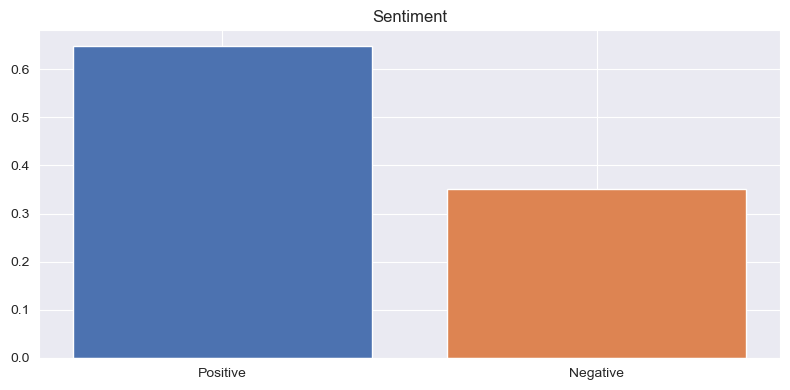

In [43]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=pd.Series(citadel_comments_pred).value_counts(['label']),
        color=colors[:2])
plt.title('Sentiment')
plt.show()
